In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [20]:
#head set up
pd.set_option('display.max_columns', None)

#Import de toutes les datas
df = pd.read_csv(filepath_or_buffer="C:/Users/pterron/Documents/Projet python/valeursfoncieres-2018.txt", sep="|", decimal=",", nrows=10000)

#Visu
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant de document     0 non-null      float64
 1   Reference document          0 non-null      float64
 2   1 Articles CGI              0 non-null      float64
 3   2 Articles CGI              0 non-null      float64
 4   3 Articles CGI              0 non-null      float64
 5   4 Articles CGI              0 non-null      float64
 6   5 Articles CGI              0 non-null      float64
 7   No disposition              10000 non-null  int64  
 8   Date mutation               10000 non-null  object 
 9   Nature mutation             10000 non-null  object 
 10  Valeur fonciere             9542 non-null   float64
 11  No voie                     4253 non-null   float64
 12  B/T/Q                       280 non-null    object 
 13  Type de voie                3691

Traitement des données

In [7]:
#Valeur manquante
values = df.isna().sum()/len(df)
#Colonne vides
df = df.dropna(axis = 1, how='all')

In [8]:
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,1,03/01/2018,Vente,109000.0,13.0,NaN,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,73,NaN,1.0,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,73.0,4.0,NaN,NaN,NaN
1,1,03/01/2018,Vente,109000.0,13.0,NaN,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,73,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
2,1,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,163.0,4.0,S,NaN,949.0
3,1,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,163.0,4.0,AG,JARD,420.0
4,1,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,51.0,2.0,AG,JARD,420.0


In [9]:
#Colonnes sous un certain pourcentage
perc = len(df)*0.20
#print(perc)
#print(df.isna().sum())
df = df.dropna(axis = 1, thresh=perc)
#df.isna().sum()

In [10]:
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,AN,73,2,2.0,Appartement,73.0,4.0,NaN,NaN
1,1,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,AN,73,1,3.0,Dépendance,0.0,0.0,NaN,NaN
2,1,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,AH,186,0,1.0,Maison,163.0,4.0,S,949.0
3,1,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,AH,186,0,1.0,Maison,163.0,4.0,AG,420.0
4,1,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,AH,186,0,1.0,Maison,51.0,2.0,AG,420.0


In [11]:
#Supprimer ligne ou valeur cible nulle est null
df = df.dropna(axis =0, subset='Valeur fonciere')

In [12]:
#Supprimer les doublons pour supprimer les dependances
df['discretisation'] = df['Date mutation']+df['Code voie']+ df['Voie']+ df['Commune']
df = df.drop_duplicates(subset = 'discretisation', keep=False)
df = df.drop(labels='discretisation', axis = 1)

In [13]:
df.columns

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Section', 'No plan',
       'Nombre de lots', 'Code type local', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Surface terrain'],
      dtype='object')

In [14]:
#Feature a garder, trie manuel (Valeurs doublons)
l_corr =['Date mutation', 'Nature mutation', 'Valeur fonciere', 'Code postal', 'Code departement', 'Code commune', 'Type local', 'Surface reelle bati', 'Nature culture', 'Surface terrain']
df = df[l_corr]
df.head()

,Date mutation,Nature mutation,Valeur fonciere,Code postal,Code departement,Code commune,Type local,Surface reelle bati,Nature culture,Surface terrain
9,10/01/2018,Vente,3150.0,1160.0,1,304,NaN,NaN,S,126.0
10,12/01/2018,Vente,2100.0,1250.0,1,195,NaN,NaN,BT,197.0
11,04/01/2018,Vente,67000.0,1000.0,1,53,Appartement,45.0,NaN,NaN
12,11/01/2018,Vente,76200.0,1000.0,1,53,Appartement,68.0,NaN,NaN
13,17/01/2018,Vente,1000.0,1340.0,1,24,NaN,NaN,AB,5093.0


In [15]:
df.isnull().sum()/len(df) *100

Date mutation           0.000000
Nature mutation         0.000000
Valeur fonciere         0.000000
Code postal             0.000000
Code departement        0.000000
Code commune            0.000000
Type local             49.476440
Surface reelle bati    49.588631
Nature culture         14.659686
Surface terrain        14.659686
dtype: float64

Remplacement des valeurs NA

In [16]:
df.describe()

,Valeur fonciere,Code postal,Code departement,Code commune,Surface reelle bati,Surface terrain
count,2.674000e+03,2674.000000,2674.0,2674.000000,1348.000000,2282.000000
mean,1.236127e+05,1303.065445,1.0,222.980927,123.494065,2702.212971
std,1.799143e+05,228.541799,0.0,137.070745,235.567606,7494.683348
min,1.000000e+00,1000.000000,1.0,2.000000,0.000000,1.000000
25%,2.000000e+04,1160.000000,1.0,72.000000,70.000000,408.250000
50%,9.025000e+04,1270.000000,1.0,231.000000,92.000000,839.500000
75%,1.750000e+05,1370.000000,1.0,344.000000,118.000000,1939.750000
max,4.650000e+06,1960.000000,1.0,451.000000,4000.000000,145326.000000


<Axes: >

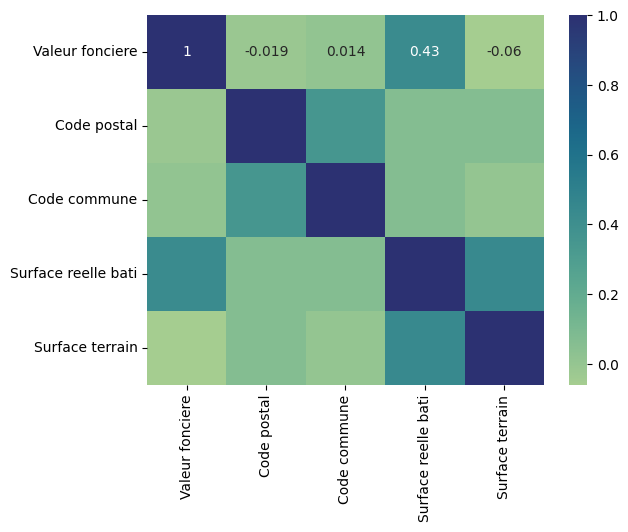

In [17]:
#Correlation
l_corr = ['Date mutation', 'Nature mutation', 'Valeur fonciere', 'Code postal', 'Code commune', 'Type local', 'Surface reelle bati', 'Nature culture', 'Surface terrain']
corr = df[l_corr].corr(numeric_only=True)
corr
#Visualisation
sns.heatmap(corr, annot = True, cmap = 'crest')

#pairplot
#sns.scatterplot(df, x='Date mutation', y='Valeur fonciere' )

In [18]:
#df.loc[df['Date mutation'] == '09/02/2018']
#df.describe(include='all')
#df['discretisation'].value_counts()
df.head()

,Date mutation,Nature mutation,Valeur fonciere,Code postal,Code departement,Code commune,Type local,Surface reelle bati,Nature culture,Surface terrain
9,10/01/2018,Vente,3150.0,1160.0,1,304,NaN,NaN,S,126.0
10,12/01/2018,Vente,2100.0,1250.0,1,195,NaN,NaN,BT,197.0
11,04/01/2018,Vente,67000.0,1000.0,1,53,Appartement,45.0,NaN,NaN
12,11/01/2018,Vente,76200.0,1000.0,1,53,Appartement,68.0,NaN,NaN
13,17/01/2018,Vente,1000.0,1340.0,1,24,NaN,NaN,AB,5093.0


In [19]:
#Import Packages
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px

#Incorporate data

#Initialize the app - incorporate css
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = Dash(__name__, external_stylesheets=external_stylesheets)

#App layout
app.layout = html.Div([
    html.Div(className='row', children = 'My first app with Data & Gaphe', 
             style = {'textAlign': 'center', 'color': 'white', 'fontSize': 30}),
    
    html.Div(className='row', children =[
        dcc.RadioItems( options=['Code postal', 'Nature mutation', 'Surface terrain'],
                       value='Code postal',
                       inline=True,
                       id='controls-and-radio-item')],
                       style = {'color': 'white', 'fontSize': 20}),

    html.Div(className='row', children =[
        html.Div(className='six columns', children=[
            dash_table.DataTable(data=df.to_dict('records'), page_size=11, style_table={'overflowX': 'auto'})
        ]),
        html.Div(className='six columns', children=[
            dcc.Graph(figure = {}, id='controls-and-graph')
        ])
    ])     
])

# Add controls to build the interaction
@callback(
    Output(component_id='controls-and-graph', component_property='figure'),
    Input(component_id='controls-and-radio-item', component_property='value')
)
def update_graph(col_chosen):
    fig = px.histogram(df, x=col_chosen, y='Valeur fonciere', histfunc='avg')
    return fig


#Run the app
if __name__ == '__main__':
    app.run(debug = True)